IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(array([[[   0,    0]],

       [[   0, 2865]],

       [[2943, 2865]],

       [[2943,    0]]], dtype=int32),)
(array([[[0, 0]],

       [[0, 1]],

       [[0, 2]],

       ...,

       [[3, 0]],

       [[2, 0]],

       [[1, 0]]], dtype=int32),)


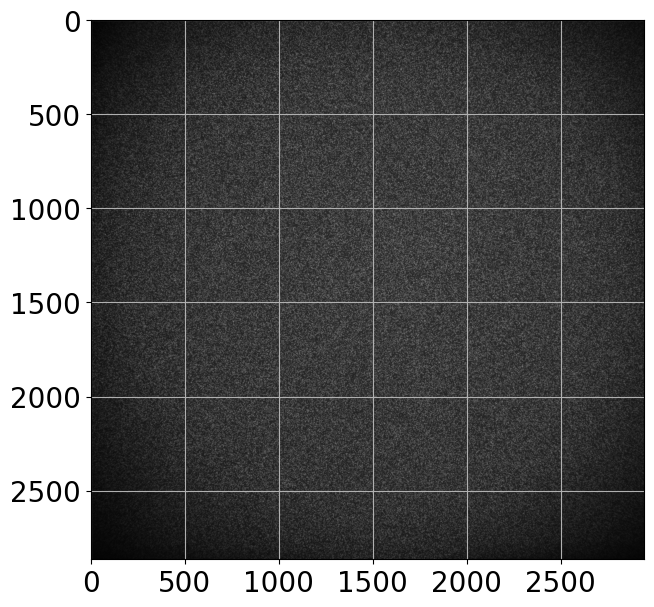

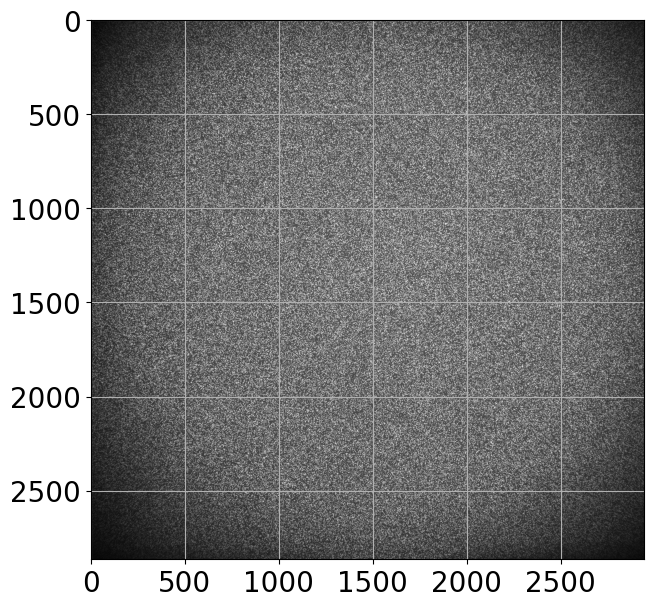

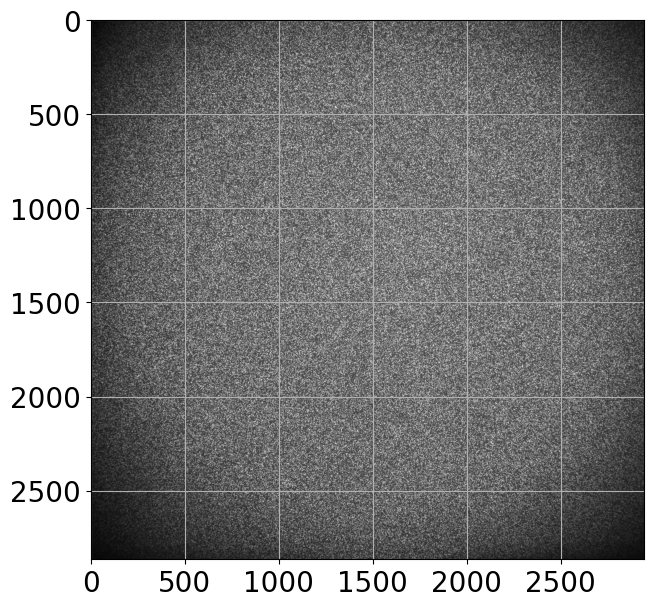

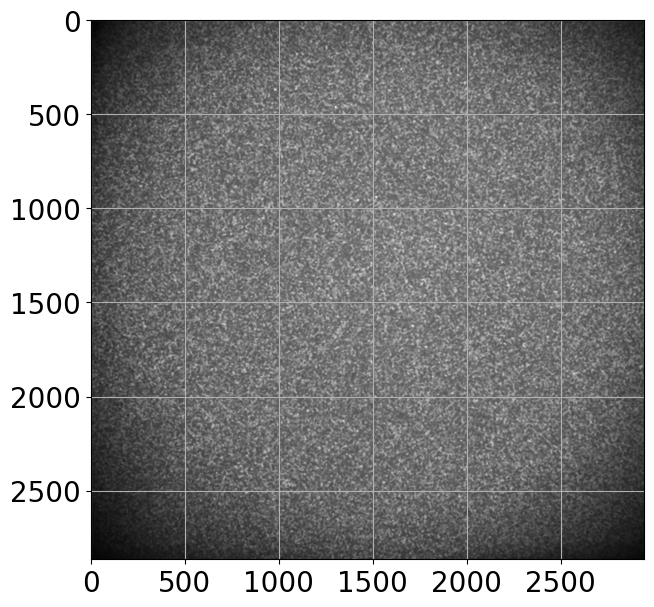

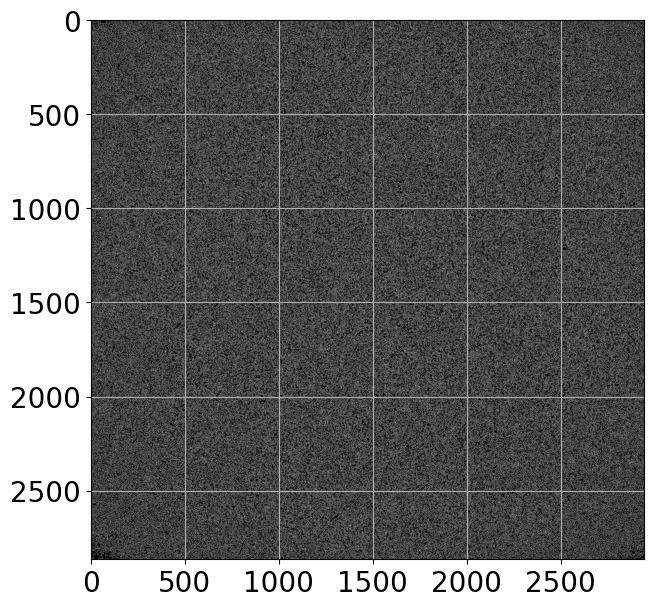

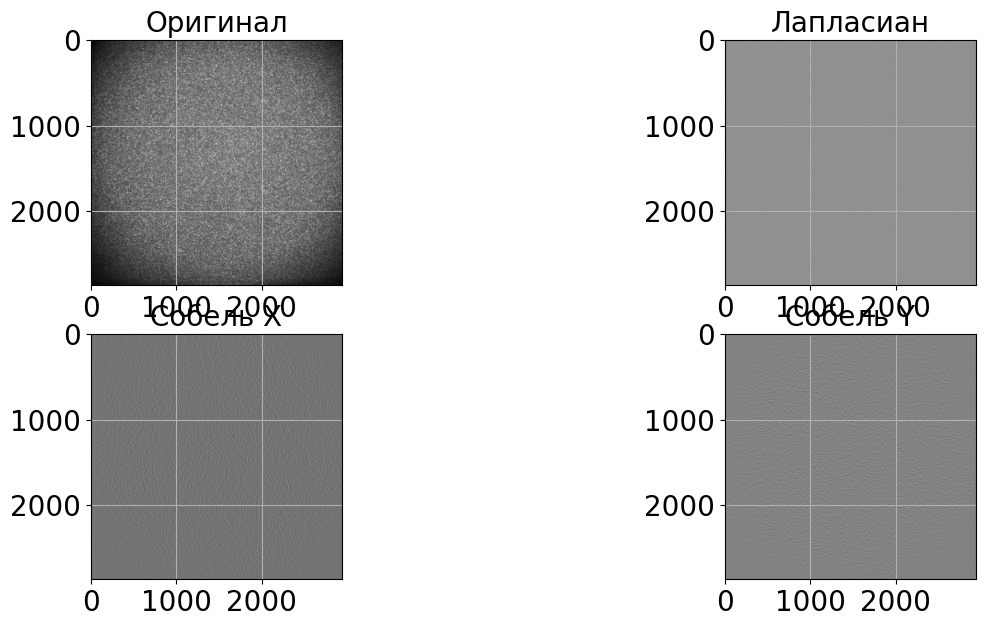

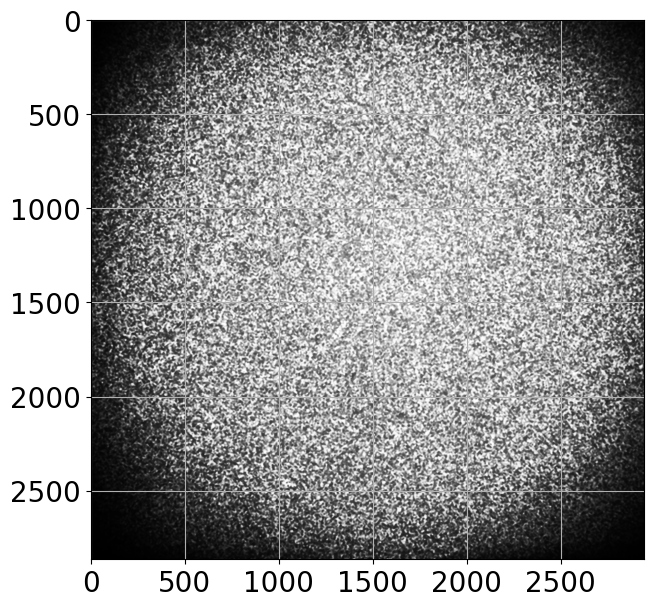

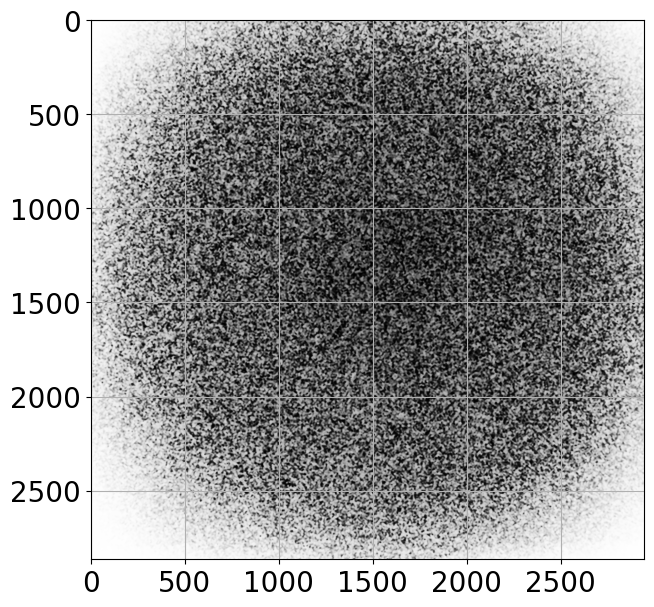

In [17]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
#from libtiff import TIFF
from skimage import io
#import pytiff
from tifffile import tifffile
#import OpenImageIO as oiio
#import rasterio
#import tensorflow_io as tfio
import cv2



def main():
    image = cv2.imread("C:/s_1_1101_a.jpg",0)
    plt.figure(figsize=(15,7))
    plt.imshow(image,cmap='gray')
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    # фильтрация шума
    kernel = np.array([[0, -1, 0], [-1, 6, -1], [0, -1, 0]])
  

    image = cv2.filter2D(image, -1, kernel)
    plt.figure(figsize=(15,7))
    plt.imshow(image,cmap='gray')
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    
    image = cv2.GaussianBlur(image,(3,3),0)
    plt.figure(figsize=(15,7))
    plt.imshow(image,cmap='gray')
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    
    image = cv2.medianBlur(image, 11)
    plt.figure(figsize=(15,7))
    plt.imshow(image,cmap='gray')
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    
    edges=cv2.Canny(image,1,2)
    plt.figure(figsize=(15,7))
    plt.imshow(edges,cmap='gray')
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    #пороги?
    ret, thresh = cv2.threshold(edges, 0.01, 1, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    print(contours)
    print()
    ret, thresh = cv2.threshold(edges, 0.01, 1, 0)
    contours, hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    print(contours)
    print()
    
    laplacian = cv2.Laplacian(image,cv2.CV_64F)
    sobelx = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=1)  # x
    sobely = cv2.Sobel(image,cv2.CV_64F,0,1,ksize=1)  # y
    plt.figure(figsize=(15,7))
    plt.subplot(2,2,1)
    plt.imshow(image,cmap = 'gray')
    plt.title('Оригинал',fontsize=20)
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    plt.subplot(2,2,2)
    plt.imshow(laplacian,cmap = 'gray')
    plt.title('Лапласиан',fontsize=20)
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    plt.subplot(2,2,3)
    plt.imshow(sobelx,cmap = 'gray')
    plt.title('Собель X',fontsize=20)
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    plt.subplot(2,2,4)
    plt.imshow(sobely,cmap = 'gray')
    plt.title('Собель Y',fontsize=20)
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    
    #пороги?
    ret, thresh = cv2.threshold(image, 0.01, 1, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    print(contours)
    ret, thresh = cv2.threshold(image, 0.01, 1, 0)
    contours, hierarchy = cv2.findContours(image,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    print(contours)
    
    image = cv2.equalizeHist(image)
    plt.figure(figsize=(15,7))
    plt.imshow(image,cmap='gray')
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    
    
    image = 255 - image
    plt.figure(figsize=(15,7))
    plt.imshow(image,cmap='gray')
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    plt.show()
    
    
        
    
    
if __name__ == "__main__":
    main()
    